<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## **Data Preparation and Basic Statistical Analysis in Retail**


Estimated time needed: **1** hour


## Abstract


This lab is dedicated to downloading, pre-preparing and making basic statistical analysis of Retail based on Global Food Prices data from the World Food Programme covering such goods as maize, rice, beans, fish, and sugar for 76 countries and some 1,500 markets.


## Introduction


The main problem to be solved in this laboratory is the download, pre-preparation and statistical analysis including visualization of a DataSet. 

The basic difficulty of statistical analysis of real data is that it is prepared or presented in a form that is not convenient for machine learning methods. Very often real data consists of mixed information in different scales. Therefore, this data must be found and rescaled or recalculated. Therefore, this lab shows methods of automatic pre-preparation of real data for such cases. The next problem is the ability to competently manipulate and transform big data in order to obtain a convenient statistical report both in tabular form and in the form of graphs.


## Materials and methods


In this lab, we will learn how to download data, pre-prepare it, perform basic statistical analysis and visualize the data.
This lab consists of the following steps:
* Data download - download and display data from a file
* Data pre-preparation - preliminary analysis of the data structure, change of the data and table structure
* Statistical analysis - basic statistical analysis
* Data visualization - output of various data on graphs
* Building a trend line - the basic method of building a trend line and a forecast based on it.


The statistical data was obtained from the https://www.kaggle.com/lasaljaywardena/global-food-prices-dataset. This DataSet released under CC BY-IGO license that allow of encouraging free re-use of its data, both for non-commercial and commercial purposes. 


## Prerequisites
* [Python](https://www.python.org) - basic level
* [Pandas](https://pandas.pydata.org) - basic level 
* Statistics - basic level


## Objectives


After completing this lab, you will be able to:


* Download a DataSet from *.csv files
* Analysis of Data
* Create new columns and recalculate values of existing ones
* Transform the table
* Visualize data with pandas and matplotlib
* Expect
     * Minimum and maximum value
     * Average
     * Quarters
     * Pivot tables


## Import Libraries/Define Auxiliary Functions


**Running outside Skills Network Labs.** This notebook was tested within Skills Network Labs. Running in another environment should work as well, but is not guaranteed and may require different setup routine.


Libraries such as Pandas, MatplotLib and SeaBorn should be installed.


In [ ]:
# conda install -c conda-forge pandas

In [ ]:
# conda install -c conda-forge matplotlib

In [ ]:
# conda install -c conda-forge seaborn 

In [ ]:
conda install -c conda-forge scikit-learn

## Download data from a .csv file


Some libraries should be imported before you can begin.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Let's disable warnings by **[warnings.filterwarnings()](https://docs.python.org/3/library/warnings.html)**.


In [2]:
import warnings
warnings.filterwarnings('ignore')

Further specify the value of the precision parameter equal to 2 to display two decimal signs (instead of 6 as default) by **[pandas.set_option()](https://pandas.pydata.org/docs/reference/api/pandas.set_option.html)**  and  **[pd.options.display](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)**.


In [3]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

The next step is to download the data file from the repository by **[read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)**.


In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0YMGEN/global_food_prices.csv')

Now let's look at our DataSet.


In [5]:
df

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,1,2014,50.00,NaN
1,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,2,2014,50.00,NaN
2,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,3,2014,50.00,NaN
3,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,4,2014,50.00,NaN
4,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,5,2014,50.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050633,271.00,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.00,ZWL,15,Retail,5,KG,6,2021,233.33,NaN
2050634,271.00,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.00,ZWL,15,Retail,116,100 ML,6,2021,112.50,NaN
2050635,271.00,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.00,ZWL,15,Retail,5,KG,6,2021,114.00,NaN
2050636,271.00,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.00,ZWL,15,Retail,66,250 G,6,2021,59.50,NaN


## Data pre-preparation


Let's study the DataSet. As you can see, it consist of 2 050 638 rows × 18 columns and contains information of different types. We should make sure that Python recognized the data types correctly. In order to do this, we should use **[pandas.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info)**.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050638 entries, 0 to 2050637
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   adm0_id             float64
 1   adm0_name           object 
 2   adm1_id             int64  
 3   adm1_name           object 
 4   mkt_id              int64  
 5   mkt_name            object 
 6   cm_id               int64  
 7   cm_name             object 
 8   cur_id              float64
 9   cur_name            object 
 10  pt_id               int64  
 11  pt_name             object 
 12  um_id               int64  
 13  um_name             object 
 14  mp_month            int64  
 15  mp_year             int64  
 16  mp_price            float64
 17  mp_commoditysource  float64
dtypes: float64(4), int64(7), object(7)
memory usage: 281.6+ MB


The data includes country, locality, market, goods purchased, price & currency used, quantity exchanged, and month/year of the purchase.

1. adm0_id: country id
2. adm0_name: country name
3. adm1_id: locality id
4. adm1_name: locality name
5. mkt_id: market id
6. mkt_name: market name
7. cm_id: commodity purchase id
8. cm_name: commodity purchased
9. cur_id: currency id
10. cur_name: name of currency
11. pt_id: market type id
12. pt_name: market type (Retail/Wholesale/Producer/Farm Gate)
13. um_id: measurement id
14. um_name: unit of goods measurement
15. mp_month: month recorded
16. mpyear: year recorded
17. mpprice: price paid
18. mp_commoditysource: Source supplying price information


As you can see, the DataSet contains a lot of id fields. It is an artifact of database extraction. These fields are not suitable for analysis and should be excluded. Let's choose fields for analysis.


In [7]:
col = ['adm0_name', 'mkt_name', 'cm_name', 'cur_name', 'pt_name', 'um_name', 'mp_month', 'mp_year', 'mp_price']

And transform the DataSet:


In [8]:
df = df[col]
df

,adm0_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price
0,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.00
1,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.00
2,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.00
3,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.00
4,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.00
...,...,...,...,...,...,...,...,...,...
2050633,Zimbabwe,Mbilashaba,Beans (sugar) - Retail,ZWL,Retail,KG,6,2021,233.33
2050634,Zimbabwe,Mbilashaba,Toothpaste - Retail,ZWL,Retail,100 ML,6,2021,112.50
2050635,Zimbabwe,Mbilashaba,Laundry soap - Retail,ZWL,Retail,KG,6,2021,114.00
2050636,Zimbabwe,Mbilashaba,Handwash soap - Retail,ZWL,Retail,250 G,6,2021,59.50


Let's study the information from DataSet columns. 


Let's create a list of countries in this DataSet using **[pandas.Series.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)** and show the results in a table **[pandas.Series.to_frame()](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html)**.


In [9]:
df['adm0_name'].value_counts().to_frame()

,adm0_name
Rwanda,137746
Bassas da India,137093
Syrian Arab Republic,116588
Philippines,82099
Mali,73843
...,...
Viet Nam,275
Azerbaijan,125
Eritrea,100
Georgia,80


As you can see, the DataSet contains information about 98 countries. The most amount of information is about Rwanda, Bassas da India and Syrian Arab Republic markets.


Similarly determine how many markets there are in this dataset.


In [10]:
df['mkt_name'].value_counts().to_frame()

,mkt_name
National Average,19748
Bogota,5798
Khujand,5270
Dushanbe,5270
Gharm,5241
...,...
Faya,2
Socogim,2
Vigwagwa,1
Ali Addeh,1


As you can see, there are 3235 markets.


Let's study the information about the types of commodity purchased by **[pandas.unique()](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)**. This list should be ordered to simplify the analysis (**[list.sort()](https://docs.python.org/3/howto/sorting.html)**).


In [11]:
u = list(df['cm_name'].unique())
u.sort()
u

['Alcohol (spray) - Retail',
 'Anchovies - Retail',
 'Apples (dried) - Retail',
 'Apples (red) - Retail',
 'Apples (red) - Wholesale',
 'Apples - Retail',
 'Apples - Wholesale',
 'Avocados - Retail',
 'Avocados - Wholesale',
 'Bananas (imported) - Retail',
 'Bananas (lakatan) - Retail',
 'Bananas (latundan) - Retail',
 'Bananas (local) - Retail',
 'Bananas (medium size) - Retail',
 'Bananas (saba) - Retail',
 'Bananas - Retail',
 'Bananas - Wholesale',
 'Barley (mixed) - Wholesale',
 'Barley (white) - Wholesale',
 'Barley - Retail',
 'Barley - Wholesale',
 'Batteries (big) - Retail',
 'Batteries (small) - Retail',
 'Beans (black) - Retail',
 'Beans (black) - Wholesale',
 'Beans (black, Nayarit) - Wholesale',
 'Beans (black, Veracruz) - Wholesale',
 'Beans (black, Zacatecas) - Wholesale',
 'Beans (black, imported) - Wholesale',
 'Beans (butter) - Retail',
 'Beans (catarino) - Retail',
 'Beans (cranberry) - Retail',
 'Beans (cranberry) - Wholesale',
 'Beans (dry) - Retail',
 'Beans (dry)

As you can see, there are a lot of purchase types. Moreover, "Exchange rate" values is used as a simple purchase. Let's study these rows using DataFrame slice and the function **[pandas.Series.str.contains()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html)** 


In [12]:
df[df['cm_name'].str.contains('Exchange rate')]

,adm0_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price
665,Afghanistan,Fayzabad,Exchange rate - Retail,AFN,Retail,USD/LCU,2,2014,57.55
666,Afghanistan,Fayzabad,Exchange rate - Retail,AFN,Retail,USD/LCU,7,2014,56.60
667,Afghanistan,Fayzabad,Exchange rate - Retail,AFN,Retail,USD/LCU,8,2014,56.62
668,Afghanistan,Fayzabad,Exchange rate - Retail,AFN,Retail,USD/LCU,9,2014,57.00
669,Afghanistan,Fayzabad,Exchange rate - Retail,AFN,Retail,USD/LCU,10,2014,57.38
...,...,...,...,...,...,...,...,...,...
1996823,Yemen,Al Jabeen,Exchange rate (unofficial) - Retail,YER,Retail,USD/LCU,1,2021,589.02
1996824,Yemen,Al Jabeen,Exchange rate (unofficial) - Retail,YER,Retail,USD/LCU,2,2021,592.54
1996825,Yemen,Al Jabeen,Exchange rate (unofficial) - Retail,YER,Retail,USD/LCU,3,2021,598.16
1996826,Yemen,Al Jabeen,Exchange rate (unofficial) - Retail,YER,Retail,USD/LCU,4,2021,593.24


As you can see, these purchase rows consist of the Exchange rate for an exact month and year for countries in local currency units against the US dollar. This rate is indicated in mp_price. The column um_name contains short currency name.

It can also be noted that the value of purchases is specified in local currency units.

This means that we should recalculate the column mp_price to USD for comparing the market price of different countries. It will be demonstrated later.


Let's study what currencies are used in different countries.

We can use **[pandas.crosstab()](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)**.


In [13]:
pd.crosstab(df["adm0_name"],
            df["cur_name"],
            )

cur_name,AFN,AMD,AOA,ARS,AZN,BDT,BIF,BOB,BTN,BYR,...,UGX,USD,VEF,VND,XAF,XOF,YER,ZAR,ZMW,ZWL
adm0_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,15427,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,1272,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Armenia,0,20600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0
Viet Nam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,275,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,36806,0,0,0


As you can see, this view is not good for analysis. It's better to use **[pandas.DataFrame.groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby)**.


In [14]:
(df[df['um_name']=='USD/LCU']).groupby('adm0_name')['cur_name'].first().to_frame()

,cur_name
adm0_name,
Afghanistan,AFN
Armenia,AMD
Chad,XAF
Democratic Republic of the Congo,CDF
Ethiopia,ETB
Iraq,IQD
Lebanon,LBP
Liberia,LRD
Libya,LYD


Let's return to the study of types of purchases. As you can see above, there are a huge number of varieties of similar types of purchases. In particular:


In [15]:
df[df['cm_name'].str.contains('Bread')].groupby('cm_name')['cm_name'].first().values

array(['Bread (bakery) - Retail',
       'Bread (bakery, parallel market) - Retail',
       'Bread (brotchen) - Retail', 'Bread (brown) - Retail',
       'Bread (common) - Retail', 'Bread (first grade flour) - Retail',
       'Bread (high grade flour) - Retail', 'Bread (khoboz) - Retail',
       'Bread (pita) - Retail', 'Bread (rye) - Retail',
       'Bread (shop) - Retail', 'Bread (traditional) - Retail',
       'Bread (vetkoek) - Retail', 'Bread (wheat) - Retail',
       'Bread - Retail'], dtype=object)

Let's leave in the DataSet the information on the products of the basic consumer basket and the exchange rate.


In [16]:
df = df[df['cm_name'].str.contains('Bread') | 
        df['cm_name'].str.contains('Milk') | 
        df['cm_name'].str.contains('Meat') | 
        df['cm_name'].str.contains('Fish') | 
        df['cm_name'].str.contains('Rice') |
        df['cm_name'].str.contains('Water') |
        df['cm_name'].str.contains('Exchange rate')]
df

,adm0_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price
0,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.00
1,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.00
2,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.00
3,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.00
4,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.00
...,...,...,...,...,...,...,...,...,...
2050625,Zimbabwe,Matibi,Fish (kapenta) - Retail,ZWL,Retail,KG,12,2020,1187.50
2050626,Zimbabwe,Matibi,Fish (kapenta) - Retail,ZWL,Retail,KG,2,2021,1123.33
2050627,Zimbabwe,Matibi,Fish (kapenta) - Retail,ZWL,Retail,KG,3,2021,1390.00
2050628,Zimbabwe,Mbilashaba,Rice - Retail,ZWL,Retail,KG,6,2021,110.62


As you can see, the number of rows has decreased. Let's investigate the list of purchases types.

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [17]:
u = list(df['cm_name'].unique()) ##YOUR CODE GOES HERE##
u.sort()
u

['Bread (bakery) - Retail',
 'Bread (bakery, parallel market) - Retail',
 'Bread (brotchen) - Retail',
 'Bread (brown) - Retail',
 'Bread (common) - Retail',
 'Bread (first grade flour) - Retail',
 'Bread (high grade flour) - Retail',
 'Bread (khoboz) - Retail',
 'Bread (pita) - Retail',
 'Bread (rye) - Retail',
 'Bread (shop) - Retail',
 'Bread (traditional) - Retail',
 'Bread (vetkoek) - Retail',
 'Bread (wheat) - Retail',
 'Bread - Retail',
 'Exchange rate (unofficial) - Retail',
 'Exchange rate - Retail',
 'Fish (appolo) - Retail',
 'Fish (barbel, sole) - Retail',
 'Fish (bonga) - Retail',
 'Fish (canned) - Retail',
 'Fish (catfish) - Retail',
 'Fish (catfish) - Wholesale',
 'Fish (dry) - Retail',
 'Fish (dry) - Wholesale',
 'Fish (dry, katta) - Retail',
 'Fish (dry, katta) - Wholesale',
 'Fish (dry, sprats) - Retail',
 'Fish (dry, sprats) - Wholesale',
 'Fish (fresh) - Retail',
 'Fish (fresh) - Wholesale',
 'Fish (fresh, silvi) - Retail',
 'Fish (frigate tuna) - Retail',
 'Fish (f

Let's group products of different types into one group for the further analysis. To do this, first use the **[lambda-function](https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/)** and slices to remove the types of markets from the purchases' names. They are written with the characters " -". Next, we discard purchases subtypes that begin with the characters " (".


In [18]:
df.loc[:, 'cm_name'] = df['cm_name'].apply(lambda x : str(x)[:str(x).find(' -')] )
df.loc[:, 'cm_name'] = df['cm_name'].apply(lambda x : str(x) if str(x).find(' (') == -1 else str(x)[:str(x).find(' (')] )
df

,adm0_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price
0,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,1,2014,50.00
1,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,2,2014,50.00
2,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,3,2014,50.00
3,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,4,2014,50.00
4,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,5,2014,50.00
...,...,...,...,...,...,...,...,...,...
2050625,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,12,2020,1187.50
2050626,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,2,2021,1123.33
2050627,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,3,2021,1390.00
2050628,Zimbabwe,Mbilashaba,Rice,ZWL,Retail,KG,6,2021,110.62


In [19]:
df['cm_name'].unique()

array(['Bread', 'Rice', 'Exchange rate', 'Milk', 'Meat', 'Fish',
       'Water spinach', 'Water', 'Watermelons'], dtype=object)

As you can see, we have only nine types of purchases including Exchange rate. Also, we have additional types of purchases: 'Water spinach', 'Watermelons'. They remained because they contain the word Water. We will remove them later.


Let's investigate the column Market name.


In [20]:
df['pt_name'].unique()

array(['Retail', 'Wholesale', 'Producer', 'Farm Gate'], dtype=object)

As you can see, there are only four types of markets.


Before analysis, we should investigate goods units:


In [21]:
pd.crosstab(df["um_name"],
            df["cm_name"],
            )

cm_name,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water,Water spinach,Watermelons
um_name,,,,,,,,,
0.8 KG,0,0,0,0,552,0,0,0,0
1.1 KG,7913,0,0,0,0,0,0,0,0
1.2 KG,0,0,526,0,0,0,0,0,0
1.4 KG,0,0,0,0,0,1946,0,0,0
1.5 KG,0,0,472,0,0,0,0,0,0
1.5 L,0,0,0,0,0,0,825,0,0
1.8 KG,0,0,0,0,711,0,0,0,0
10 KG,0,0,0,364,0,108,0,0,0
100 KG,0,0,0,0,0,8604,0,0,0


As you can see there are a large number of units. It is necessary to calculate the cost of a particular purchase in standard units of measurement to perform statistical processing. We take 1 kg as a standard.
To do this, let's create a dictionary that consists of key (type of unit) - value (proportion coefficient to 1 kg). Of course, we will not change the Exchange rate - for this we will use a value equal to 1 (the last row in the dictionary).


In [22]:
d = {'KG': 1,
 'Unit': 1,
 'Pound': 0.45,
 '400 G': 0.4,
 '150 G': 0.15,
 '5 pcs': 1,
 '500 G': 0.5,
 '700 G': 0.7,
 '800 G': 0.8,
 '1.1 KG': 1.1,
 'Libra': 0.45,
 '900 G': 0.9,
 '100 KG': 100,
 '46 KG': 46,
 'Cuartilla': 2.88,
 '90 KG': 90,
 '120 KG': 120,
 '50 KG': 50,
 'MT': 1000,
 '45 KG': 45,
 '84 KG': 84,
 '100 Pounds': 45,
 'Marmite': 1,
 '5 KG': 5,
 '10 KG': 10,
 '1.4 KG': 1.4,
 '25 KG': 25,
 '2 KG': 2,
 'Loaf' : 1,
 '50 Pounds': 22.5,
 '380 G': 0.38,
 '500 ML': 0.5,
 '385 G': 0.385,
 '0.8 KG': 0.8,
 '200 ML': 0.2,
 '20 G': 0.02,
 '1.8 KG': 1.8,
 '125 G': 0.125,
 '20 KG': 20,
 '170 G': 0.17,
 '185 G': 0.185,
 '200 G': 0.2,
 '1.5 KG': 1.5,
 '1.2 KG': 1.2,
 'Bundle': 46,
 '160 G': 0.16,
 'Cubic meter': 1,
 '1.5 L': 1.5,
 'L': 1,
 'USD/LCU': 1}

The **[pandas.Series.map()](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)** can also be used for **the values replacement in a column** by passing it as an argument dictionary in the form of `{old_value: new_value} `. 

Let's apply this dictionary to calculate a new column with coefficients. Then use this column to calculate the price of purchases for 1 kg.


In [23]:
df['um_koef'] = df['um_name'].map(d)
df['mp_price_un'] = df['mp_price'] / df['um_koef']

In [24]:
df

,adm0_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,um_koef,mp_price_un
0,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,1,2014,50.00,1.00,50.00
1,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,2,2014,50.00,1.00,50.00
2,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,3,2014,50.00,1.00,50.00
3,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,4,2014,50.00,1.00,50.00
4,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,5,2014,50.00,1.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...
2050625,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,12,2020,1187.50,1.00,1187.50
2050626,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,2,2021,1123.33,1.00,1123.33
2050627,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,3,2021,1390.00,1.00,1390.00
2050628,Zimbabwe,Mbilashaba,Rice,ZWL,Retail,KG,6,2021,110.62,1.00,110.62


We have prepared data values for statistical analysis. 

In this lab, we will analyze values and dynamics of customer basket purchases prices in different countries.
We should group rows by Countries, Year, Month and Markets. Then transform the table creating new separate columns for each type of customer basket purchases.

We can do it using  **[pivot_table()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html?highlight=pivot_table#pandas.DataFrame.pivot_table)**.


In [25]:
df_res = pd.pivot_table(df, values= 'mp_price', index= ['adm0_name', 'mp_year', 'mp_month', 'mkt_name'], columns=['cm_name'], aggfunc='mean', margins=False)

In [26]:
df_res

cm_name                                               Bread  Exchange rate  \
adm0_name   mp_year mp_month mkt_name                                        
Afghanistan 2000    1        Hirat                    15.63            NaN   
                             Jalalabad                14.86            NaN   
                             Kabul                    14.26            NaN   
                             Kandahar                 16.25            NaN   
                    2        Hirat                    15.63            NaN   
...                                                     ...            ...   
Zimbabwe    2021    6        Sizinda Shopping Centre    NaN            NaN   
                             Torwood 1                  NaN            NaN   
                             Torwood 2                  NaN            NaN   
                             Victoria Falls             NaN            NaN   
                             Zvishavane Urban           NaN            NaN   

cm_name                                                 Fish  Meat  Milk  \
adm0_name   mp_year mp_month mkt_name                                      
Afghanistan 2000    1        Hirat                       NaN   NaN   NaN   
                             Jalalabad                   NaN   NaN   NaN   
                             Kabul                       NaN   NaN   NaN   
                             Kandahar                    NaN   NaN   NaN   
                    2        Hirat                       NaN   NaN   NaN   
...                                                      ...   ...   ...   
Zimbabwe    2021    6        Sizinda Shopping Centre     NaN   NaN   NaN   
                             Torwood 1               1000.00   NaN   NaN   
                             Torwood 2                   NaN   NaN   NaN   
                             Victoria Falls          1270.45   NaN   NaN   
                             Zvishavane Urban        1227.70   NaN   NaN   

cm_name                                                Rice  Water  \
adm0_name   mp_year mp_month mkt_name                                
Afghanistan 2000    1        Hirat                      NaN    NaN   
                             Jalalabad                  NaN    NaN   
                             Kabul                      NaN    NaN   
                             Kandahar                   NaN    NaN   
                    2        Hirat                      NaN    NaN   
...                                                     ...    ...   
Zimbabwe    2021    6        Sizinda Shopping Centre  82.50    NaN   
                             Torwood 1                85.00    NaN   
                             Torwood 2                85.00    NaN   
                             Victoria Falls          123.43    NaN   
                             Zvishavane Urban        152.44    NaN   

cm_name                                               Water spinach  \
adm0_name   mp_year mp_month mkt_name                                 
Afghanistan 2000    1        Hirat                              NaN   
                             Jalalabad                          NaN   
                             Kabul                              NaN   
                             Kandahar                           NaN   
                    2        Hirat                              NaN   
...                                                             ...   
Zimbabwe    2021    6        Sizinda Shopping Centre            NaN   
                             Torwood 1                          NaN   
                             Torwood 2                          NaN   
                             Victoria Falls                     NaN   
                             Zvishavane Urban                   NaN   

cm_name                                               Watermelons  
adm0_name   mp_year mp_month mkt_name                              
Afghanistan 2000    1    

As you can see, the new DataSet consists only of 170 510 rows.

Now we can easily remove the columns: "Water spinach" and "Watermelons".


In [27]:
df_res.columns

Index(['Bread', 'Exchange rate', 'Fish', 'Meat', 'Milk', 'Rice', 'Water',
       'Water spinach', 'Watermelons'],
      dtype='object', name='cm_name')

In [28]:
df_res = df_res[['Exchange rate', 'Bread', 'Fish', 'Meat', 'Milk', 'Rice', 'Water']] ##YOUR CODE GOES HERE##
df_res

cm_name                                               Exchange rate  Bread  \
adm0_name   mp_year mp_month mkt_name                                        
Afghanistan 2000    1        Hirat                              NaN  15.63   
                             Jalalabad                          NaN  14.86   
                             Kabul                              NaN  14.26   
                             Kandahar                           NaN  16.25   
                    2        Hirat                              NaN  15.63   
...                                                             ...    ...   
Zimbabwe    2021    6        Sizinda Shopping Centre            NaN    NaN   
                             Torwood 1                          NaN    NaN   
                             Torwood 2                          NaN    NaN   
                             Victoria Falls                     NaN    NaN   
                             Zvishavane Urban                   NaN    NaN   

cm_name                                                 Fish  Meat  Milk  \
adm0_name   mp_year mp_month mkt_name                                      
Afghanistan 2000    1        Hirat                       NaN   NaN   NaN   
                             Jalalabad                   NaN   NaN   NaN   
                             Kabul                       NaN   NaN   NaN   
                             Kandahar                    NaN   NaN   NaN   
                    2        Hirat                       NaN   NaN   NaN   
...                                                      ...   ...   ...   
Zimbabwe    2021    6        Sizinda Shopping Centre     NaN   NaN   NaN   
                             Torwood 1               1000.00   NaN   NaN   
                             Torwood 2                   NaN   NaN   NaN   
                             Victoria Falls          1270.45   NaN   NaN   
                             Zvishavane Urban        1227.70   NaN   NaN   

cm_name                                                Rice  Water  
adm0_name   mp_year mp_month mkt_name                               
Afghanistan 2000    1        Hirat                      NaN    NaN  
                             Jalalabad                  NaN    NaN  
                             Kabul                      NaN    NaN  
                             Kandahar                   NaN    NaN  
                    2        Hirat                      NaN    NaN  
...                                                     ...    ...  
Zimbabwe    2021    6        Sizinda Shopping Centre  82.50    NaN  
                             Torwood 1                85.00    NaN  
                             Torwood 2                85.00    NaN  
                             Victoria Falls          123.43    NaN  
                             Zvishavane Urban        152.44    NaN  

[170510 rows x 7 columns]

## Statistical analysis


### Basic statistic


As you can see, the resulting DataSet has a user-friendly structure. Grouped columns are arranged as indexes. However, for statistical analysis, these columns should be transformed into the appearance of normal columns. We can do it using **[pandas.DataFrame.reset_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)**.


In [29]:
df_stat = df_res.reset_index()
df_stat

cm_name,adm0_name,mp_year,mp_month,mkt_name,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
0,Afghanistan,2000,1,Hirat,NaN,15.63,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2000,1,Jalalabad,NaN,14.86,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2000,1,Kabul,NaN,14.26,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2000,1,Kandahar,NaN,16.25,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2000,2,Hirat,NaN,15.63,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
170505,Zimbabwe,2021,6,Sizinda Shopping Centre,NaN,NaN,NaN,NaN,NaN,82.50,NaN
170506,Zimbabwe,2021,6,Torwood 1,NaN,NaN,1000.00,NaN,NaN,85.00,NaN
170507,Zimbabwe,2021,6,Torwood 2,NaN,NaN,NaN,NaN,NaN,85.00,NaN
170508,Zimbabwe,2021,6,Victoria Falls,NaN,NaN,1270.45,NaN,NaN,123.43,NaN


Let's determine how much information is available for different countries in this DataSet in absolute and normalized view.


In [30]:
df_stat["adm0_name"].value_counts().to_frame()

,adm0_name
Mali,11774
Bassas da India,10668
Niger,9858
Senegal,7541
Rwanda,5154
...,...
Sudan,91
Algeria,80
Argentina,62
Azerbaijan,29


In [31]:
df_stat["adm0_name"].value_counts(normalize=True).to_frame()

,adm0_name
Mali,0.07
Bassas da India,0.06
Niger,0.06
Senegal,0.04
Rwanda,0.03
...,...
Sudan,0.00
Algeria,0.00
Argentina,0.00
Azerbaijan,0.00


As you can see, information about 93 countries is available. Also, Mali, India and Niger make the greatest number of rows.

Let's create a list of available countries:


In [32]:
##YOUR CODE GOES HERE##

df_stat["adm0_name"].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Bassas da India', 'Belarus', 'Benin',
       'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran  (Islamic Republic of)', 'Iraq', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mexico', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Paraguay',
       'Peru'

Let's calculate basic statistical information about Mali purchases using **[pandas.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe)**.


In [33]:
df_stat[df_stat['adm0_name']=='Mali'].describe()

cm_name,mp_year,mp_month,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
count,11774.00,11774.00,0.00,0.00,359.00,573.00,590.00,11774.00,0.00
mean,2014.68,6.37,NaN,NaN,1916.26,2448.63,1660.77,348.58,NaN
std,4.47,3.41,NaN,NaN,597.71,411.04,369.07,62.28,NaN
min,2003.00,1.00,NaN,NaN,300.00,825.00,662.50,120.00,NaN
25%,2010.00,3.00,NaN,NaN,1500.00,2250.00,1500.00,316.33,NaN
50%,2016.00,6.00,NaN,NaN,1980.00,2333.33,1555.00,353.50,NaN
75%,2019.00,9.00,NaN,NaN,2250.00,2666.67,1750.00,375.00,NaN
max,2021.00,12.00,NaN,NaN,4050.00,3833.33,4700.00,820.00,NaN


In this table, you can see consolidated statistical information like the number of non-empty rows, mean, standard deviation, max, min etc. 
As you can see, Bread and Water are not popular purchases in India.

Of course, you can calculate any stat coefficient using **[statistics](https://docs.python.org/3/library/statistics.html)** or **[numpy](https://numpy.org)**.


Let's calculate the same for Ukraine.


In [34]:
##YOUR CODE GOES HERE##

df_stat[df_stat['adm0_name']=='Ukraine'].describe()

cm_name,mp_year,mp_month,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
count,1165.00,1165.00,0.00,1165.00,0.00,1165.00,1165.00,1165.00,0.00
mean,2015.54,6.66,NaN,9.41,NaN,60.77,12.20,16.30,NaN
std,1.09,3.39,NaN,2.50,NaN,12.37,3.38,3.56,NaN
min,2014.00,1.00,NaN,4.39,NaN,34.90,6.81,7.76,NaN
25%,2015.00,4.00,NaN,7.54,NaN,52.44,9.20,15.16,NaN
50%,2016.00,7.00,NaN,10.00,NaN,60.80,11.64,16.65,NaN
75%,2016.00,10.00,NaN,11.03,NaN,66.44,14.88,18.29,NaN
max,2017.00,12.00,NaN,15.74,NaN,94.47,20.62,29.75,NaN


As you can see, Ukrainian people like Bread but Fish is not popular.


Let's investigate China:


In [36]:
##YOUR CODE GOES HERE##

df_stat[df_stat['adm0_name']=='China'].describe()

cm_name,mp_year,mp_month,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
count,410.00,410.00,0.00,0.00,0.00,0.00,0.00,410.00,0.00
mean,2016.93,6.38,NaN,NaN,NaN,NaN,NaN,4.38,NaN
std,1.97,3.41,NaN,NaN,NaN,NaN,NaN,0.39,NaN
min,2014.00,1.00,NaN,NaN,NaN,NaN,NaN,3.60,NaN
25%,2015.00,3.00,NaN,NaN,NaN,NaN,NaN,4.14,NaN
50%,2017.00,6.00,NaN,NaN,NaN,NaN,NaN,4.24,NaN
75%,2019.00,9.00,NaN,NaN,NaN,NaN,NaN,4.76,NaN
max,2020.00,12.00,NaN,NaN,NaN,NaN,NaN,5.80,NaN


As you can see, China has information only about Rice.


What about India:


In [37]:
##YOUR CODE GOES HERE##

df_stat[df_stat['adm0_name']=='Bassas da India'].describe()


cm_name,mp_year,mp_month,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
count,10668.00,10668.00,0.00,0.00,0.00,0.00,6644.00,10647.00,0.00
mean,2012.04,6.40,NaN,NaN,NaN,NaN,41.10,108.24,NaN
std,7.44,3.44,NaN,NaN,NaN,NaN,9.01,290.73,NaN
min,1994.00,1.00,NaN,NaN,NaN,NaN,16.00,5.00,NaN
25%,2008.00,3.00,NaN,NaN,NaN,NaN,35.00,16.50,NaN
50%,2014.00,6.00,NaN,NaN,NaN,NaN,40.14,26.00,NaN
75%,2018.00,9.00,NaN,NaN,NaN,NaN,46.00,32.57,NaN
max,2021.00,12.00,NaN,NaN,NaN,NaN,75.00,2481.59,NaN


India has information about Rice and Milk.

Let's study the dynamics of purchase prices in India. In order to do this, we should filter the data and group it by Year:


In [38]:
d = df_stat[df_stat['adm0_name']=='Bassas da India'].groupby('mp_year').mean()
d

cm_name,mp_month,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
mp_year,,,,,,,,
1994,6.90,NaN,NaN,NaN,NaN,NaN,7.82,NaN
1995,6.58,NaN,NaN,NaN,NaN,NaN,8.03,NaN
1996,6.58,NaN,NaN,NaN,NaN,NaN,9.05,NaN
1997,6.45,NaN,NaN,NaN,NaN,NaN,9.63,NaN
1998,6.41,NaN,NaN,NaN,NaN,NaN,10.12,NaN
1999,6.41,NaN,NaN,NaN,NaN,NaN,11.17,NaN
2000,6.51,NaN,NaN,NaN,NaN,NaN,122.81,NaN
2001,4.46,NaN,NaN,NaN,NaN,NaN,215.84,NaN
2002,6.52,NaN,NaN,NaN,NaN,NaN,114.06,NaN


### Visualization


We can plot this information using **[pandas.DataFrame.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)**.


<AxesSubplot:xlabel='mp_year'>

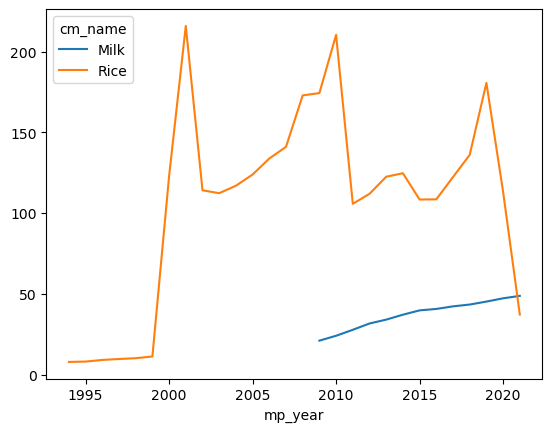

In [39]:
d[['Milk','Rice']].plot()

As you can see, Rice price is not stable in India and has some waves every ten years. Milk price is growing every year.


Let's do the same for Ukraine:


In [40]:
d = df_stat[df_stat['adm0_name']=='Ukraine'].groupby('mp_year').mean()
d

cm_name,mp_month,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
mp_year,,,,,,,,
2014,7.38,NaN,5.61,NaN,44.40,8.25,11.06,NaN
2015,6.50,NaN,9.29,NaN,58.43,10.35,19.13,NaN
2016,6.50,NaN,10.24,NaN,61.82,12.90,15.94,NaN
2017,6.36,NaN,12.02,NaN,76.76,17.00,18.29,NaN


<AxesSubplot:xlabel='mp_year'>

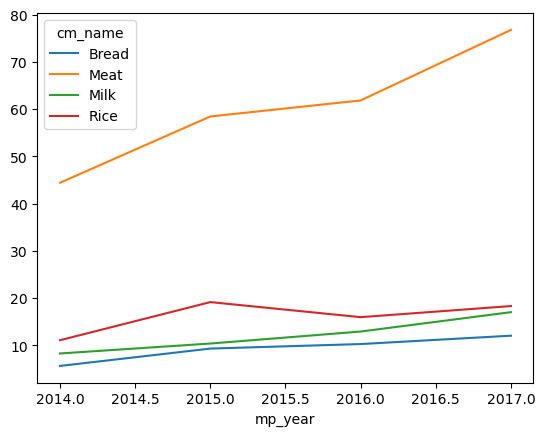

In [41]:
d[['Bread', 'Meat', 'Milk', 'Rice']].plot()

As you can see, the most expensive purchase in Ukraine is Meat. The prices have no waves but they are growing every year. Inflation might be the reason.


Let's take a look at China Rice price dynamics:


In [42]:
d = df_stat[df_stat['adm0_name']=='China'].groupby('mp_year').mean()
d

cm_name,mp_month,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
mp_year,,,,,,,,
2014,6.50,NaN,NaN,NaN,NaN,NaN,4.33,NaN
2015,6.50,NaN,NaN,NaN,NaN,NaN,4.41,NaN
2016,6.50,NaN,NaN,NaN,NaN,NaN,4.41,NaN
2017,6.50,NaN,NaN,NaN,NaN,NaN,4.45,NaN
2018,6.50,NaN,NaN,NaN,NaN,NaN,4.52,NaN
2019,6.50,NaN,NaN,NaN,NaN,NaN,4.42,NaN
2020,5.50,NaN,NaN,NaN,NaN,NaN,4.10,NaN


<AxesSubplot:xlabel='mp_year'>

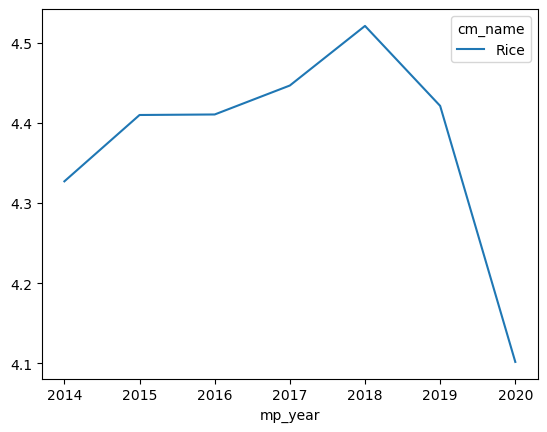

In [43]:
##YOUR CODE GOES HERE##

d[['Rice']].plot()

As you can see, the price has been falling down from 4.5 RMB to 4.10 RMB during the last year.


Let's investigate mean prices in different Chinese markets:


cm_name   mp_year  mp_month  Exchange rate  Bread  Fish  Meat  Milk  Rice  \
mkt_name                                                                    
Hangzhou  2016.93      6.38            NaN    NaN   NaN   NaN   NaN  4.25   
Hubei     2016.93      6.38            NaN    NaN   NaN   NaN   NaN  4.01   
Jiujiang  2016.93      6.38            NaN    NaN   NaN   NaN   NaN  4.12   
Wuhan     2016.93      6.38            NaN    NaN   NaN   NaN   NaN  4.66   
Yuncheng  2016.93      6.38            NaN    NaN   NaN   NaN   NaN  4.88   

cm_name   Water  
mkt_name         
Hangzhou    NaN  
Hubei       NaN  
Jiujiang    NaN  
Wuhan       NaN  
Yuncheng    NaN  


<AxesSubplot:xlabel='mkt_name'>

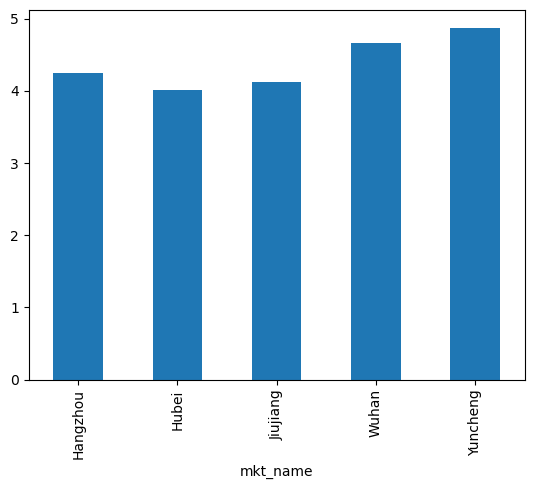

In [44]:
d = df_stat[df_stat['adm0_name']=='China'].groupby(['mkt_name']).mean()
print(d)
d['Rice'].plot.bar()

As you can see, Yuncheng is the most expensive market, Hubei is the cheapest one.


You can plot it using Pie plot too:


In [ ]:
d['Rice'].plot.pie()

Also, we can investigate how the structure of market prices dependencies has been changed by years:


In [ ]:
d = df_stat[df_stat['adm0_name']=='China']
d = d[['mkt_name', 'mp_year', 'Rice']]
d = pd.pivot_table(d, values= 'Rice', index= ['mp_year'], columns='mkt_name', aggfunc='mean', margins=False)
print(d)
d.plot.bar()

Let's compare the market prices of different countries.


As mentioned earlier, the DataSet includes countries where the national currency is the US dollar. Let's take a look at them:


In [ ]:
usd_countries = list((df[(df['cur_name']=='USD')])['adm0_name'].unique())
usd_countries

The field "Exchange rate" is empty for these countries. Therefore, for price comparison, we need to change the value of this column to one:


In [ ]:
df_stat.loc[:, 'Exchange rate'] = df_stat.apply(lambda x : 1 if x['adm0_name'] in usd_countries else x['Exchange rate'], axis=1 )

Before calculating prices in USD, we delete all the rows that contain empty values in the Exchange rate column using **[pandas.DataFrame.dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)**:


In [ ]:
df_stat_multy = df_stat[df_stat['Exchange rate'].notna()]
df_stat_multy

Let's get a list of countries, where the Exchange rate is specified:


In [ ]:
df_stat_multy["adm0_name"].value_counts().to_frame()

In [ ]:
len(df_stat_multy["adm0_name"].value_counts())

As you can see, only 23 countries are left. Let's recalculate the Rice prices to the US dollar.


In [ ]:
df_stat_multy['Rice_USD'] = df_stat_multy['Rice'] / df_stat_multy['Exchange rate']
df_stat_multy

Then we can compare the dynamics of Rice price in different countries:


In [ ]:
df_stat_multy = pd.pivot_table(df_stat_multy, values= 'Rice_USD', index= ['mp_year'], columns='adm0_name', aggfunc='mean', margins=False)
df_stat_multy

In [ ]:
len(df_stat_multy.columns)

As you can see, only 17 countries out of 23 contain information about Rice price.


Let's compare price dynamics for Congo, Somalia, Tajikistan and Ecuador.


In [ ]:
df_stat_multy = df_stat_multy[['Democratic Republic of the Congo','Somalia', 'Tajikistan', 'Ecuador']]

In [ ]:
df_stat_multy.plot()

### Trend line


Let's calculate the trend of Rice prices for the mentioned countries. In order to do this, we should:
1. Extract Series from DataFrame for the necessary country.
2. Drop NaN values.
3. Extract **x** (Years) and **y** (Rice price) values from the Series and transform it to vector.
4. Create a **[sklearn.linear_model.LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)** model.
5. Fit the model on **x** and **y** values.
6. Predict the values for the next 3 years.
7. Plot the result.


In [ ]:
for c in df_stat_multy.columns:
    y = df_stat_multy[c].dropna()
    x = y.index
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    x = np.reshape(x, (-1, 1)) # transform X values
    y = np.reshape(y.values, (-1, 1)) # transform Y values
    model.fit(x, y)
    X_pred= np.append(x, [2022, 2023, 2024])
    X_pred = np.reshape(X_pred, (-1, 1))
    # calculate trend
    trend = model.predict(X_pred)
    plt.figure()
    plt.plot(X_pred, trend, "-", label='Trend')
    plt.plot(x, y, ".", label='Real data')
    plt.xlabel('Year')
    plt.ylabel('Price in USD')
    plt.legend(title=c)
    plt.show()

As you can see from the figures, a linear model is not exact, but it allows to calculate the basic trend of prices. For better prognostication, we should use different approaches. It will be shown in the next labs.


## Conclusions


As evidenced in practice, the data obtained in real field experiments is not suitable for direct statistical processing. Therefore, in this lab we learned the basic methods of downloading and preliminary data preparation. We studied how to download, transform, group, recalculate and visualize data.
Unlike the well-known classical approaches to statistical data analysis, Python contains many powerful libraries that allow you to manipulate data easily and quickly. Therefore, we have learned the basic methods of automating a Pandas library for pre-preparation and statistical data analysis. We also learned the basic methods of visualizing the obtained data with the MatplotLib library which contains effective means of visual data analysis. 


## Authors


Developer: [Yaroslav Vyklyuk, prof., PhD., DrSc](https://author.skills.network/instructors/yaroslav_vyklyuk_2)


Retail Consultant: [Olha Vdovichena, ass. prof, PhD](https://author.skills.network/instructors/olha_vdovichena)


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).
